In [326]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import geopy as gp
from matplotlib import rcParams
from scipy import stats

In [2]:
acs_income = pd.read_csv('../data/clean/ACS_income.csv')
acs_housing = pd.read_csv('../data/clean/ACS_DP04_housing.csv')
rental_prices = pd.read_csv('../data/clean/nyc_rental_prices.csv')
zhome_value = pd.read_csv('../data/clean/zhome_value.csv')
airbnb = pd.read_csv('../data/clean/inside_airbnb_clean.gz')

In [3]:
acs_income['borough'] = acs_income['borough'].str.upper()
acs_housing['borough'] = acs_housing['borough'].str.upper()
rental_prices['borough'] = rental_prices['borough'].str.upper()
zhome_value['borough'] = zhome_value['borough'].str.upper()
airbnb['borough'] = airbnb['borough'].str.upper()

In [4]:
acs_income = acs_income.drop_duplicates()
acs_income['year'] = acs_income['year'].astype('str')
acs_income_boro = acs_income.groupby(['borough','year'])[['latino_mean_income','african_american_mean_income','white_mean_income']].mean().reset_index()


In [5]:
acs_housing = acs_housing.drop_duplicates()
acs_housing['year'] = acs_housing['year'].astype('str')
acs_housing_boro = acs_housing.groupby(['borough','year']).agg({'total_housing_units' : 'sum',
                                                                'rent_occ_median_rent' : 'mean',
                                                                'own_occ_median_value' : 'mean',
                                                                'owner_occupied_units' : 'sum',
                                                                'renter_occupied_units' : 'sum',}).reset_index()

In [6]:
#airbnb = airbnb.drop(columns='Unnamed: 0')
airbnb['year'] = pd.to_datetime(airbnb['last_scraped']).dt.to_period('Y').astype('str')
airbnb['borough'] = airbnb['borough'].replace('Staten Island','Staten_Island')
airbnb_boro = airbnb.groupby(['borough','year'])['id'].count().to_frame().reset_index()
airbnb_boro = airbnb_boro.rename(columns = {'id':'airbnb_listings'})

In [7]:
boro_merge = acs_housing_boro.merge(airbnb_boro, on=['borough','year'], how='outer')
boro_merge = boro_merge.merge(acs_income_boro, on=['borough','year'], how ='outer')

In [8]:
boro_merge['airbnb_listings'].sum()

335503.0

In [9]:
boro_merge['renter_occupied_units'].sum()

23402575.0

In [432]:
data1 = boro_merge.melt(id_vars=['borough', 'year'], 
              value_vars=['own_occ_median_value',
                          'rent_occ_median_rent',
                          'latino_mean_income',
                         'african_american_mean_income',
                         'white_mean_income'],
              var_name='Measurement', value_name='Dollars')
data2 = boro_merge.melt(id_vars=['borough', 'year'], 
              value_vars=['airbnb_listings',
#                          'total_housing_units',
                          'owner_occupied_units',
                         'renter_occupied_units'], 
              var_name='Measurement', value_name='Count')

#data1 = data1.set_index(['borough', 'year', data1.groupby(['borough', 'year']).cumcount()])
#data2 = data2.set_index(['borough', 'year', data2.groupby(['borough', 'year']).cumcount()])




In [433]:
data1['year'] = pd.to_datetime(data1['year'], format='%Y').dt.to_period('Y')
data2['year'] = pd.to_datetime(data2['year'], format='%Y').dt.to_period('Y')


In [39]:
data2

,borough,year,Measurement,Count
0,BRONX,2011,airbnb_listings,NaN
1,BRONX,2012,airbnb_listings,NaN
2,BRONX,2013,airbnb_listings,NaN
3,BRONX,2014,airbnb_listings,NaN
4,BRONX,2015,airbnb_listings,1122.0
...,...,...,...,...
235,BRONX,2022,renter_occupied_units,NaN
236,BROOKLYN,2022,renter_occupied_units,NaN
237,MANHATTAN,2022,renter_occupied_units,NaN
238,QUEENS,2022,renter_occupied_units,NaN


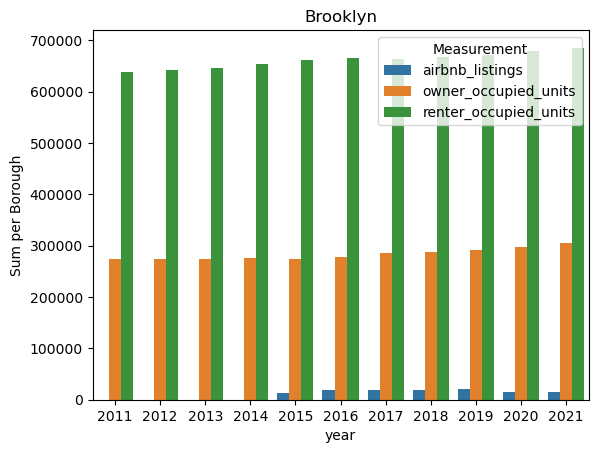

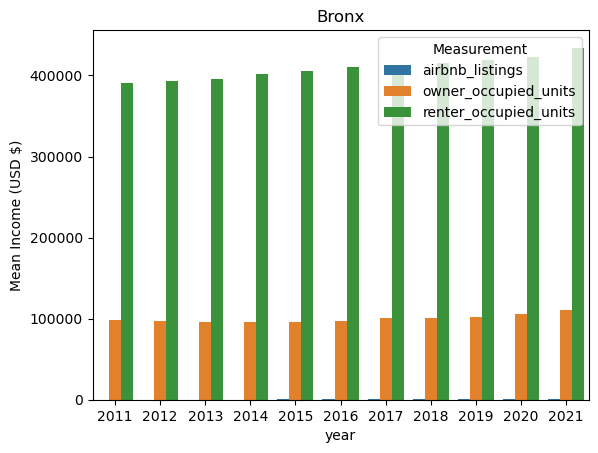

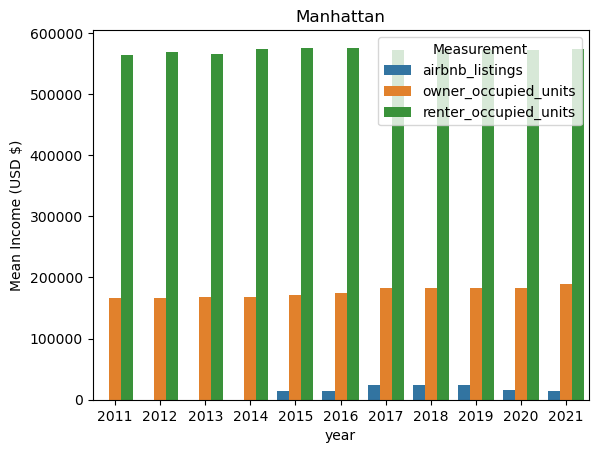

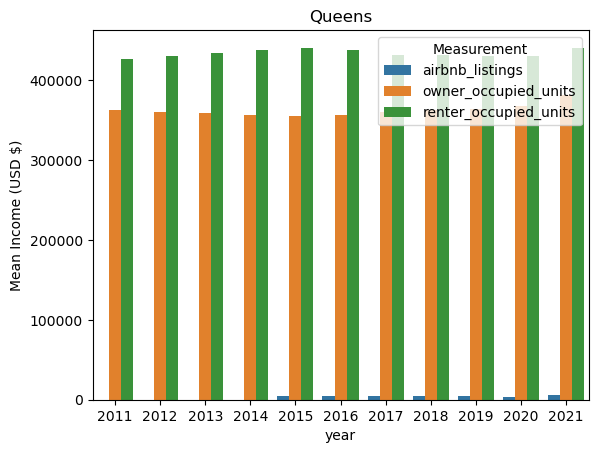

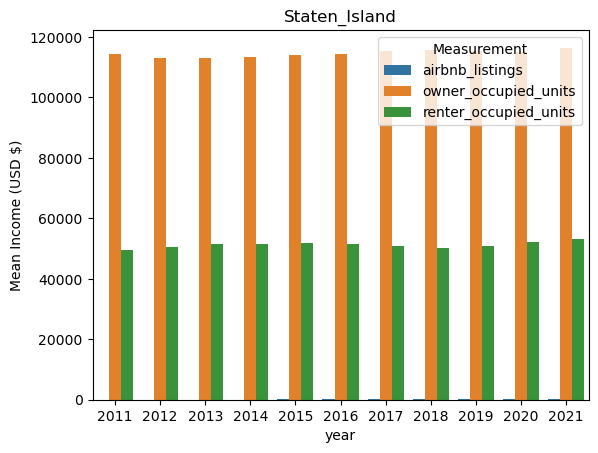

In [435]:
ax = sns.barplot(data=data2[(data2['borough']=='BROOKLYN') & (data2['year']<'2022')], x='year',y='Count',hue='Measurement')
ax.set_title('Brooklyn')
ax.set_ylabel('Sum per Borough')
plt.show()

ax = sns.barplot(data=data2[(data2['borough']=='BRONX') & (data2['year']<'2022')], x='year',y='Count',hue='Measurement')
ax.set_title('Bronx')
ax.set_ylabel('Mean Income (USD $)')
plt.show()

ax = sns.barplot(data=data2[(data2['borough']=='MANHATTAN') & (data2['year']<'2022')], x='year',y='Count',hue='Measurement')
ax.set_title('Manhattan')
ax.set_ylabel('Mean Income (USD $)')
plt.show()

ax = sns.barplot(data=data2[(data2['borough']=='QUEENS') & (data2['year']<'2022')], x='year',y='Count',hue='Measurement')
ax.set_title('Queens')
ax.set_ylabel('Mean Income (USD $)')
plt.show()

ax = sns.barplot(data=data2[(data2['borough']=='STATEN_ISLAND') & (data2['year']<'2022')], x='year',y='Count',hue='Measurement')
ax.set_title('Staten_Island')
ax.set_ylabel('Mean Income (USD $)')
plt.show()

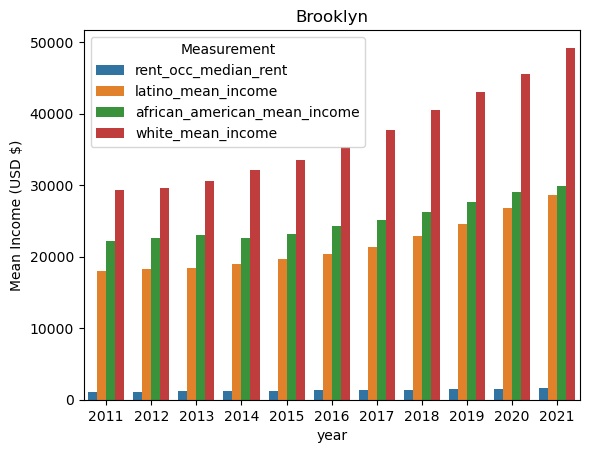

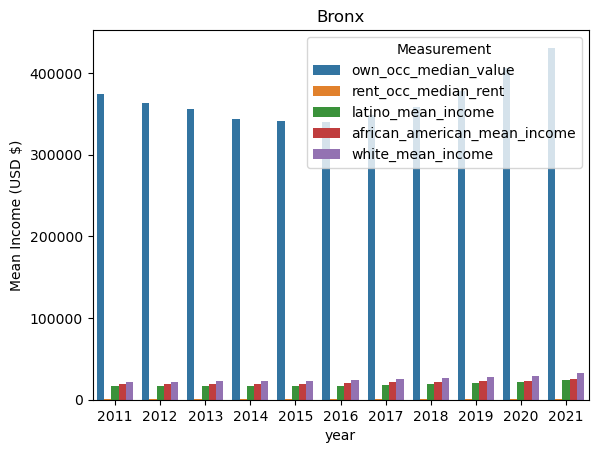

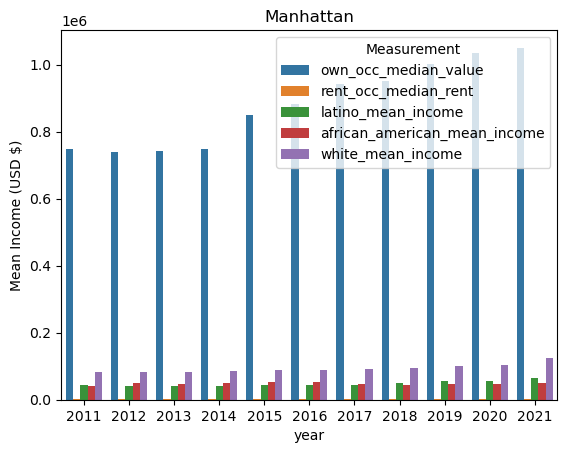

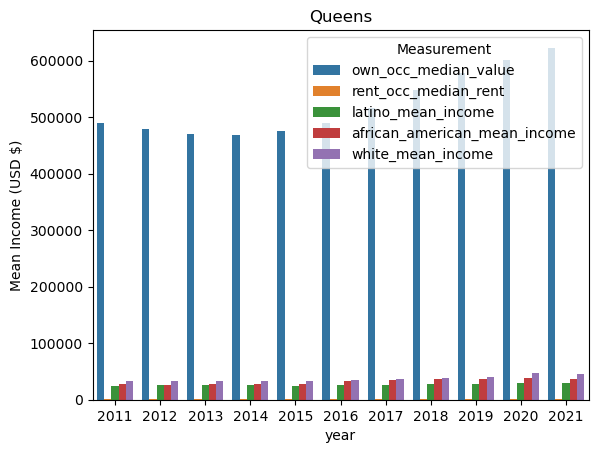

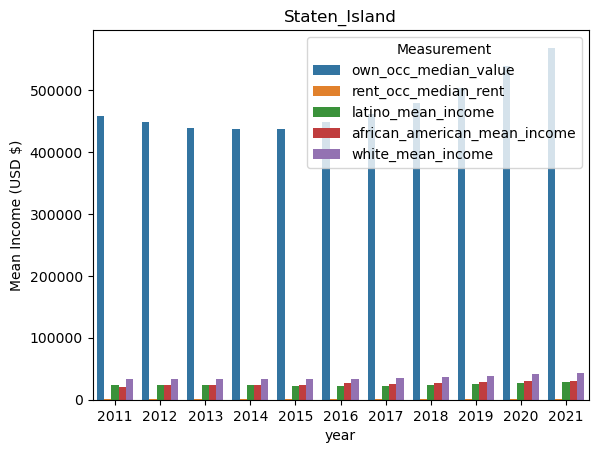

In [14]:
#THIS COULD BE A FOR LOOP WITH BOROUGH NAMES AS ITEMS IN A LIST
ax = sns.barplot(data=data1[(data1['borough']=='BROOKLYN') & (data1['year']<'2022') & (data1['Measurement']!= 'own_occ_median_value')], x='year',y='Dollars',hue='Measurement')
ax.set_title('Brooklyn')
ax.set_ylabel('Mean Income (USD $)')
plt.show()

ax = sns.barplot(data=data1[(data1['borough']=='BRONX') & (data1['year']<'2022')], x='year',y='Dollars',hue='Measurement')
ax.set_title('Bronx')
ax.set_ylabel('Mean Income (USD $)')
plt.show()

ax = sns.barplot(data=data1[(data1['borough']=='MANHATTAN') & (data1['year']<'2022')], x='year',y='Dollars',hue='Measurement')
ax.set_title('Manhattan')
ax.set_ylabel('Mean Income (USD $)')
plt.show()

ax = sns.barplot(data=data1[(data1['borough']=='QUEENS') & (data1['year']<'2022')], x='year',y='Dollars',hue='Measurement')
ax.set_title('Queens')
ax.set_ylabel('Mean Income (USD $)')
plt.show()

ax = sns.barplot(data=data1[(data1['borough']=='STATEN_ISLAND') & (data1['year']<'2022')], x='year',y='Dollars',hue='Measurement')
ax.set_title('Staten_Island')
ax.set_ylabel('Mean Income (USD $)')
plt.show()

In [15]:
boro_pre22 = boro_merge[boro_merge['year']!='2022']

In [16]:
acs_income.columns

Index(['year', 'borough', 'zipcode', 'households_s1901_total_population',
       'households_s1902_total_population', 'households_median_income',
       'households_s1901_mean_income', 'households_s1902_mean_income',
       'families_total_population', 'families_median_income',
       'families_mean_income', 'married_couple_families_total_population',
       'married_couple_families_median_income',
       'married_couple_families_mean_income',
       'nonfamily_households_total_population',
       'nonfamily_households_median_income',
       'nonfamily_households_mean_income', 'resident_total_population',
       'resident_mean_income', 'white_total_population', 'white_mean_income',
       'african_american_total_population', 'african_american_mean_income',
       'amer_indian/alaska_native_total_population',
       'amer_indian/alaska_native_mean_income', 'asian_total_population',
       'asian_mean_income', 'hawaiian/_pacific_islander_total_population',
       'hawaiian/_pacific_islan

In [250]:
airbnb.columns

Index(['id', 'last_scraped', 'host_id', 'host_name', 'neighbourhood',
       'latitude', 'longitude', 'room_type', 'bedrooms', 'availability_365',
       'calculated_host_listings_count', 'geom', 'zipcode', 'borough', 'year',
       'availability_pct'],
      dtype='object')

In [333]:
ab_filt = airbnb[['zipcode','year','borough','id','host_id']]
ab_change = ab_change[ab_change['year'] != '2022']
income_change = acs_income[['zipcode','borough','year','latino_mean_income','white_mean_income','african_american_mean_income','amer_indian/alaska_native_mean_income']]
hous_filt = acs_housing[['zipcode','borough','year',
                         'total_housing_units','occupied_housing_units','owner_occupied_units',
                        'renter_occupied_units', 'vacant_housing_units',
                         'own_occ_median_value','rent_occ_median_rent',
                        'rental_vacancy_rate']]

In [334]:
ab_filt = ab_filt.sort_values(by=['year','zipcode'])

In [335]:
ab_list_cnt = ab_filt.groupby(['zipcode','borough','year'])['id'].count().to_frame().reset_index()

In [336]:
hous_filt = hous_filt.sort_values(by=['zipcode','year'])

hous_filt['vacant/total'] = hous_filt['vacant_housing_units'] / hous_filt['total_housing_units']*100
hous_filt['vacant/total_%change'] = hous_filt['vacant/total'].pct_change(fill_method='ffill')*100
hous_filt.loc[(hous_filt['year'] =='2011'), 'vacant/total_%change'] = np.nan

hous_filt['own/total'] = hous_filt['owner_occupied_units'] / hous_filt['total_housing_units']*100
hous_filt['own/total_%change'] = hous_filt['own/total'].pct_change(fill_method='ffill')*100
hous_filt.loc[(hous_filt['year'] =='2011'), 'own/total_%change'] = np.nan

hous_filt['own/occ_total'] = hous_filt['owner_occupied_units'] / hous_filt['occupied_housing_units']*100
hous_filt['own/occ_total_%change'] = hous_filt['own/occ_total'].pct_change(fill_method='ffill')*100
hous_filt.loc[(hous_filt['year'] =='2011'), 'own/occ_total_%change'] = np.nan

hous_filt['rent/total'] = hous_filt['renter_occupied_units'] / hous_filt['total_housing_units']*100
hous_filt['rent/total_%change'] = hous_filt['rent/total'].pct_change(fill_method='ffill')*100
hous_filt.loc[(hous_filt['year'] =='2011'), 'rent/total_%change'] = np.nan

hous_filt['rent/occ_total'] = hous_filt['renter_occupied_units'] / hous_filt['occupied_housing_units']*100
hous_filt['rent/occ_total_%change'] = hous_filt['rent/occ_total'].pct_change(fill_method='ffill')*100
hous_filt.loc[(hous_filt['year'] =='2011'), 'rent/occ_total_%change'] = np.nan


In [337]:
ab_list_cnt['ab_listing_%change'] = ab_list_cnt['id'].pct_change(fill_method='ffill')*100
ab_list_cnt.loc[(ab_list_cnt['year'] =='2011'), 'ab_listing_%change'] = np.nan

In [388]:
hous_filt.dropna()

,zipcode,borough,year,total_housing_units,occupied_housing_units,owner_occupied_units,renter_occupied_units,vacant_housing_units,own_occ_median_value,rent_occ_median_rent,...,vacant/total,vacant/total_%change,own/total,own/total_%change,own/occ_total,own/occ_total_%change,rent/total,rent/total_%change,rent/occ_total,rent/occ_total_%change
283,10001,MANHATTAN,2012,12473.0,10728.0,2818.0,7910.0,1745.0,699800.0,1771.0,...,13.990219,0.790907,22.592800,0.789085,26.267711,0.917731,63.416981,-0.449993,73.732289,-0.322929
501,10001,MANHATTAN,2013,12617.0,11024.0,3007.0,8017.0,1593.0,650200.0,1830.0,...,12.625822,-9.752503,23.832924,5.489020,27.276851,3.841750,63.541254,0.195962,72.723149,-1.368654
719,10001,MANHATTAN,2014,12638.0,11169.0,3055.0,8114.0,1469.0,597600.0,1865.0,...,11.623675,-7.937286,24.173129,1.427457,27.352494,0.277316,64.203197,1.041753,72.647506,-0.104015
937,10001,MANHATTAN,2015,13305.0,11639.0,3161.0,8478.0,1666.0,575900.0,1989.0,...,12.521608,7.725042,23.757986,-1.717374,27.158691,-0.708538,63.720406,-0.751973,72.841309,0.266772
1155,10001,MANHATTAN,2016,13520.0,11967.0,3232.0,8735.0,1553.0,460500.0,2114.0,...,11.486686,-8.265089,23.905325,0.620169,27.007604,-0.556309,64.607988,1.392933,72.992396,0.207419
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
640,11697,QUEENS,2013,2566.0,1701.0,1649.0,52.0,865.0,525600.0,908.0,...,33.710055,-6.184608,64.263445,5.387399,96.942975,1.854440,2.026500,-34.404112,3.057025,-36.603119
858,11697,QUEENS,2014,2384.0,1584.0,1534.0,50.0,800.0,516100.0,528.0,...,33.557047,-0.453893,64.345638,0.127899,96.843434,-0.102679,2.097315,3.494450,3.156566,3.256119
1948,11697,QUEENS,2019,2687.0,1456.0,1395.0,61.0,1231.0,588700.0,741.0,...,45.813175,-1.547951,51.916636,0.259585,95.810440,-1.073185,2.270190,34.785920,4.189560,32.994186
2166,11697,QUEENS,2020,2628.0,1295.0,1244.0,51.0,1333.0,598600.0,788.0,...,50.722983,10.717024,47.336377,-8.822332,96.061776,0.262327,1.940639,-14.516431,3.938224,-5.999114


In [405]:
reg_merg = hous_filt.merge(ab_list_cnt, on=['zipcode','borough','year'], how='outer')

In [406]:
reg_merg = reg_merg[reg_merg['total_housing_units'].notna()]

In [410]:
reg_merg.loc[(reg_merg['id'].isna()) & (reg_merg['year']>'2014'), 'id'] = 0

In [423]:
reg_merg

,zipcode,borough,year,total_housing_units,occupied_housing_units,owner_occupied_units,renter_occupied_units,vacant_housing_units,own_occ_median_value,rent_occ_median_rent,...,own/total,own/total_%change,own/occ_total,own/occ_total_%change,rent/total,rent/total_%change,rent/occ_total,rent/occ_total_%change,id,ab_listing_%change
0,10001,MANHATTAN,2011,12161.0,10473.0,2726.0,7747.0,1688.0,632400.0,1580.0,...,22.415920,NaN,26.028836,NaN,63.703643,NaN,73.971164,NaN,NaN,NaN
1,10001,MANHATTAN,2012,12473.0,10728.0,2818.0,7910.0,1745.0,699800.0,1771.0,...,22.592800,0.789085,26.267711,0.917731,63.416981,-0.449993,73.732289,-0.322929,NaN,NaN
2,10001,MANHATTAN,2013,12617.0,11024.0,3007.0,8017.0,1593.0,650200.0,1830.0,...,23.832924,5.489020,27.276851,3.841750,63.541254,0.195962,72.723149,-1.368654,NaN,NaN
3,10001,MANHATTAN,2014,12638.0,11169.0,3055.0,8114.0,1469.0,597600.0,1865.0,...,24.173129,1.427457,27.352494,0.277316,64.203197,1.041753,72.647506,-0.104015,NaN,NaN
4,10001,MANHATTAN,2015,13305.0,11639.0,3161.0,8478.0,1666.0,575900.0,1989.0,...,23.757986,-1.717374,27.158691,-0.708538,63.720406,-0.751973,72.841309,0.266772,350.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2370,11697,QUEENS,2017,2400.0,1398.0,1353.0,45.0,1002.0,556400.0,NaN,...,56.375000,-7.647571,96.781116,-0.217402,1.875000,-0.958333,3.218884,7.010014,1.0,0.0
2371,11697,QUEENS,2018,2553.0,1365.0,1322.0,43.0,1188.0,570900.0,NaN,...,51.782217,-8.146843,96.849817,0.070986,1.684293,-10.171041,3.150183,-2.134310,0.0,NaN
2372,11697,QUEENS,2019,2687.0,1456.0,1395.0,61.0,1231.0,588700.0,741.0,...,51.916636,0.259585,95.810440,-1.073185,2.270190,34.785920,4.189560,32.994186,0.0,NaN
2373,11697,QUEENS,2020,2628.0,1295.0,1244.0,51.0,1333.0,598600.0,788.0,...,47.336377,-8.822332,96.061776,0.262327,1.940639,-14.516431,3.938224,-5.999114,0.0,NaN


In [424]:
reg_norm = reg_merg[['zipcode', 'borough', 'year', 'total_housing_units',
       'occupied_housing_units', 'owner_occupied_units',
       'renter_occupied_units', 'vacant_housing_units', 'own_occ_median_value',
       'rent_occ_median_rent', 'id','rental_vacancy_rate']]

In [425]:
reg_norm

,zipcode,borough,year,total_housing_units,occupied_housing_units,owner_occupied_units,renter_occupied_units,vacant_housing_units,own_occ_median_value,rent_occ_median_rent,id,rental_vacancy_rate
0,10001,MANHATTAN,2011,12161.0,10473.0,2726.0,7747.0,1688.0,632400.0,1580.0,NaN,4.3
1,10001,MANHATTAN,2012,12473.0,10728.0,2818.0,7910.0,1745.0,699800.0,1771.0,NaN,4.4
2,10001,MANHATTAN,2013,12617.0,11024.0,3007.0,8017.0,1593.0,650200.0,1830.0,NaN,4.0
3,10001,MANHATTAN,2014,12638.0,11169.0,3055.0,8114.0,1469.0,597600.0,1865.0,NaN,3.1
4,10001,MANHATTAN,2015,13305.0,11639.0,3161.0,8478.0,1666.0,575900.0,1989.0,350.0,3.4
...,...,...,...,...,...,...,...,...,...,...,...,...
2370,11697,QUEENS,2017,2400.0,1398.0,1353.0,45.0,1002.0,556400.0,NaN,1.0,0.0
2371,11697,QUEENS,2018,2553.0,1365.0,1322.0,43.0,1188.0,570900.0,NaN,0.0,0.0
2372,11697,QUEENS,2019,2687.0,1456.0,1395.0,61.0,1231.0,588700.0,741.0,0.0,0.0
2373,11697,QUEENS,2020,2628.0,1295.0,1244.0,51.0,1333.0,598600.0,788.0,0.0,0.0


In [426]:
#normalization

reg_norm.iloc[:, 3:11] = reg_norm.iloc[:, 3:11].apply(lambda x: (x - x.min()) / (x.max() - x.min()))

/var/folders/2y/7l8y_vkj01l4y5yq6yr69y0w0000gn/T/ipykernel_99259/1991697795.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  reg_norm.iloc[:, 3:11] = reg_norm.iloc[:, 3:11].apply(lambda x: (x - x.min()) / (x.max() - x.min()))


In [371]:
#z score
reg_norm[(np.abs(stats.zscore(reg_norm.iloc[:,3:11])) < 3).any(axis=1)]

,zipcode,borough,year,total_housing_units,occupied_housing_units,owner_occupied_units,renter_occupied_units,vacant_housing_units,own_occ_median_value,rent_occ_median_rent,id,rental_vacancy_rate


In [372]:
#q = reg_norm.iloc[:,3:11].quantile(0.99)
#reg_norm[reg_norm.iloc[:,3:11] < q]
#q_low = reg_norm.iloc[:,3:11].quantile(0.01)
#q_hi  = df["col"].quantile(0.99)

df_filtered = reg_norm[(reg_norm.iloc[:,3:11] < reg_norm.iloc[:,3:11].quantile(0.99))]



In [373]:
df_filtered

,zipcode,borough,year,total_housing_units,occupied_housing_units,owner_occupied_units,renter_occupied_units,vacant_housing_units,own_occ_median_value,rent_occ_median_rent,id,rental_vacancy_rate
0,NaN,NaN,NaN,12161.0,10473.0,2726.0,7747.0,1688.0,632400.0,1580.0,NaN,NaN
1,NaN,NaN,NaN,12473.0,10728.0,2818.0,7910.0,1745.0,699800.0,1771.0,NaN,NaN
2,NaN,NaN,NaN,12617.0,11024.0,3007.0,8017.0,1593.0,650200.0,1830.0,NaN,NaN
3,NaN,NaN,NaN,12638.0,11169.0,3055.0,8114.0,1469.0,597600.0,1865.0,NaN,NaN
4,NaN,NaN,NaN,13305.0,11639.0,3161.0,8478.0,1666.0,575900.0,1989.0,350.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
2564,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.0,NaN
2565,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,81.0,NaN
2566,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,112.0,NaN
2567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,135.0,NaN


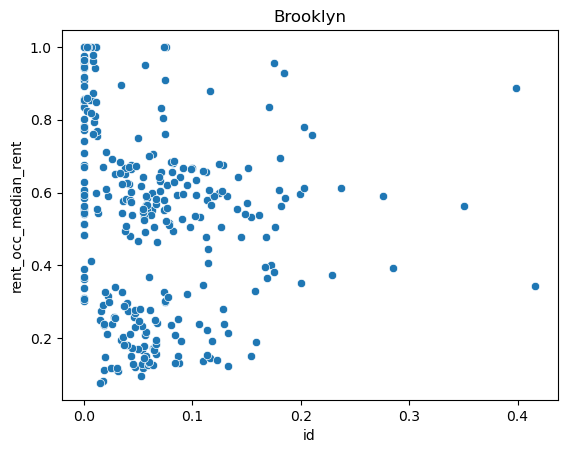

In [427]:
ax = sns.scatterplot(data=reg_norm[reg_norm['borough']=='MANHATTAN'],
                     x='id',y='rent_occ_median_rent')
ax.set_title('Brooklyn')
#ax.set_ylabel('Percent Change')
plt.show()

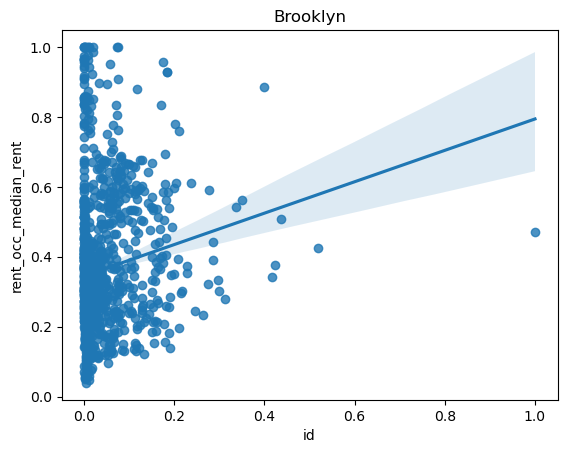

In [431]:
ax = sns.regplot(data=reg_norm,
                     x='id',y='rent_occ_median_rent')
ax.set_title('Brooklyn')
#ax.set_ylabel('Percent Change')
plt.show()

In [298]:
reg_chng_melt = reg_merg.melt(id_vars=['zipcode','borough','year'],
                               value_vars=['vacant/total_%change', 'own/total_%change', 'own/occ_total_%change',
                                           'rent/total_%change', 'rent/occ_total_%change', 'ab_listing_%change'],
                                var_name='Measurement', value_name='%')

In [299]:
reg_chng_melt

,zipcode,borough,year,Measurement,%
0,10001,MANHATTAN,2016,vacant/total_%change,-8.265089
1,10001,MANHATTAN,2017,vacant/total_%change,-6.310832
2,10001,MANHATTAN,2018,vacant/total_%change,12.365204
3,10001,MANHATTAN,2019,vacant/total_%change,-1.915679
4,10001,MANHATTAN,2020,vacant/total_%change,12.707365
...,...,...,...,...,...
7129,11694,QUEENS,2017,ab_listing_%change,-76.923077
7130,11694,QUEENS,2018,ab_listing_%change,0.000000
7131,11694,QUEENS,2019,ab_listing_%change,33.333333
7132,11694,QUEENS,2020,ab_listing_%change,175.000000


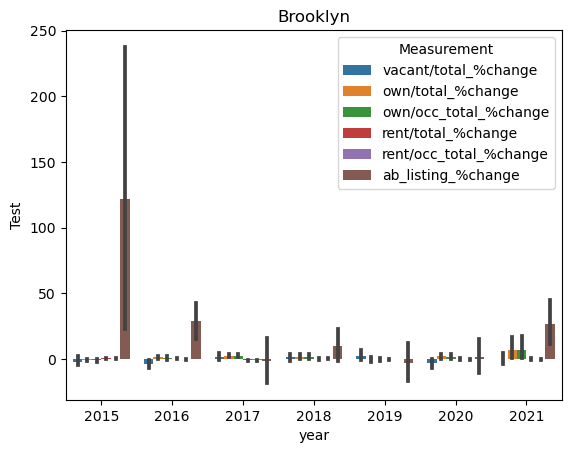

In [301]:
ax = sns.barplot(data=reg_chng_melt[(reg_chng_melt['borough']=='BROOKLYN')], x='year',y='%',hue='Measurement')
ax.set_title('Brooklyn')
ax.set_ylabel('Test')
plt.show()

In [231]:
ab_change = ab_filt.groupby(['zipcode','borough','year'])['id'].count().to_frame().reset_index()

In [232]:
change_merge= income_change.merge(ab_change, on=['zipcode','borough','year'], how='outer')

In [233]:
change_merge = change_merge.sort_values(by=['year','zipcode'])

In [234]:
zips = change_merge['zipcode'].unique()

In [235]:
change_merge['white_mi_%change'] = change_merge['white_mean_income'].pct_change(fill_method='ffill')*100
change_merge['latino_mi_%change'] = change_merge['latino_mean_income'].pct_change(fill_method ='ffill')*100
change_merge['african_am_mi_%change'] = change_merge['african_american_mean_income'].pct_change(fill_method='ffill')*100
#change_merge['abnb_%change'] = change_merge['id'].pct_change(fill_method='ffill')*100

In [236]:
change_merge.loc[(change_merge['year'] =='2011'), 'latino_mi_%change'] = np.nan
change_merge.loc[(change_merge['year'] =='2011'), 'white_mi_%change'] = np.nan
change_merge.loc[(change_merge['year'] =='2011'), 'african_am_mi_%change'] = np.nan
change_merge.loc[(change_merge['year'] == '2015'), 'abnb_%change'] = np.nan

In [237]:
change_merge = change_merge.rename(columns={'white_mi_%change' : 'White Mean Income', 
                             'latino_mi_%change': 'Latino Mean Income', 
                             'african_am_mi_%change':'African American Mean Income',
#                                           'abnb_%change' : 'Airbnb Listings'})

SyntaxError: unexpected EOF while parsing (2930370691.py, line 4)

In [472]:
reg_melt = reg_merg.melt(id_vars=['zipcode','borough','year'],
                               value_vars=['rent_occ_median_rent',
                                           'id'],
                                var_name='Measurement', value_name='Value')

reg_grp = reg_merg.groupby(['borough','year'])['rent_occ_median_rent','own_occ_median_value','id'].mean().reset_index()

mean_melt = reg_grp.melt(id_vars=['borough','year'],
                               value_vars=['rent_occ_median_rent',
                                           'own_occ_median_value',
                                           'id'],
                                var_name='Measurement', value_name='Value')

/var/folders/2y/7l8y_vkj01l4y5yq6yr69y0w0000gn/T/ipykernel_99259/1526913883.py:6: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  reg_grp = reg_merg.groupby(['borough','year'])['rent_occ_median_rent','own_occ_median_value','id'].mean().reset_index()


In [479]:
mean_melt

,borough,year,Measurement,Value
0,True,True,True,True
1,True,True,True,True
2,True,True,True,True
3,True,True,True,True
4,True,True,True,True
5,True,True,True,True
6,True,True,True,True
7,True,True,True,True
8,True,True,True,True
9,True,True,True,True


In [485]:
group1 = mean_melt[(mean_melt['Measurement']=='rent_occ_median_rent')&(mean_melt['borough']=='MANHATTAN')].dropna()
group2 = mean_melt[(mean_melt['Measurement']=='id')&(mean_melt['borough']=='MANHATTAN')].dropna()

#perform Welch's t-test
stats.ttest_ind(group2['Value'], group1['Value'], equal_var=False)

#stats.pearsonr(group1['Value'],group2['Value'])

Ttest_indResult(statistic=-19.59890205011582, pvalue=1.7605129731980862e-10)

In [ ]:
change_merge_g1 = change_merge.groupby(['borough','year'])['White Mean Income','Latino Mean Income','African American Mean Income'].mean()

change_merge_g2 = change_merge.groupby(['borough','year'])['white_mean_income','latino_mean_income','african_american_mean_income'].mean()
change_merge_g2['white_%change'] = change_merge_g2['white_mean_income'].pct_change(fill_method='ffill')*100
change_merge_g2['latino_%change'] = change_merge_g2['latino_mean_income'].pct_change(fill_method='ffill')*100
change_merge_g2['african_american_%change'] = change_merge_g2['african_american_mean_income'].pct_change(fill_method='ffill')*100

In [ ]:
change_melt_inc = change_merge.melt(id_vars=['zipcode','borough','year'],
                               value_vars=['white_mean_income',
                                           'latino_mean_income',
                                           'african_american_mean_income','id'],
                                var_name='Measurement', value_name='Value')

change_melt_diff = change_merge.melt(id_vars=['zipcode','borough','year'],
                               value_vars=['White Mean Income',
                                           'Latino Mean Income',
                                           'African American Mean Income'],
                                var_name='Measurement', value_name='% Change')

In [ ]:
corr_merge = hous_filt.merge(ab_list_cnt, on = ['zipcode','borough','year'], how='outer')

In [ ]:
corr_merge.sort_values(by='year')

In [ ]:
corr_merge= corr_merge[corr_merge['year'] != '2022']

In [ ]:
ax = sns.regplot(data=corr_merge[corr_merge['borough']=='MANHATTAN'],
                     x='id',y='rent_occ_median_rent')
ax.set_title('Brooklyn')
#ax.set_ylabel('Percent Change')
plt.show()

In [ ]:
sns.lmplot(data=change_merge,
                     x='Airbnb Listings',y='rent_occ_median_rent',hue='measurement')

In [ ]:
ax = sns.scatterplot(data=corr_merge[corr_merge['borough']=='MANHATTAN'],
                     x='id',y='rent_occ_median_rent')
ax.set_title('Brooklyn')
#ax.set_ylabel('Percent Change')
plt.show()

In [ ]:
change_merge.groupby(['borough','year'])['latino_mi_%change','white_mi_%change','african_am_mi_%change'].mean().reset_index()

In [ ]:
acs_housing[['zipcode','year','borough','total_housing_units','occupied_housing_units','vacant_housing_units']]

In [ ]:
abnb_count = airbnb.groupby(['zipcode','year'])['id'].count().to_frame().reset_index(drop=False )

In [ ]:
acs_housing.groupby(['zipcode','year'])['']

In [ ]:
ab_count_melt = abnb_count.melt(id_vars=['zipcode','year'],
                               value_vars=['id'],
                               var_name='Listings')

data1 = boro_merge.melt(id_vars=['borough', 'year'], 
              value_vars=['own_occ_median_value',
                          'rent_occ_median_rent',
                          'latino_mean_income',
                         'african_american_mean_income',
                         'white_mean_income'],
              var_name='Measurement', value_name='Dollars')
data2 = boro_merge.melt(id_vars=['borough', 'year'], 
              value_vars=['airbnb_listings',
                          'total_housing_units',
                          'owner_occupied_units',
                         'renter_occupied_units'], 
              var_name='Measurement', value_name='Count')

In [496]:
reg_merg.columns

Index(['const', 'zipcode', 'borough', 'year', 'total_housing_units',
       'occupied_housing_units', 'owner_occupied_units',
       'renter_occupied_units', 'vacant_housing_units', 'own_occ_median_value',
       'rent_occ_median_rent', 'rental_vacancy_rate', 'vacant/total',
       'vacant/total_%change', 'own/total', 'own/total_%change',
       'own/occ_total', 'own/occ_total_%change', 'rent/total',
       'rent/total_%change', 'rent/occ_total', 'rent/occ_total_%change', 'id',
       'ab_listing_%change'],
      dtype='object')

                             OLS Regression Results                             
Dep. Variable:     vacant_housing_units   R-squared:                       0.112
Model:                              OLS   Adj. R-squared:                  0.111
Method:                   Least Squares   F-statistic:                     149.7
Date:                  Sat, 04 Feb 2023   Prob (F-statistic):           1.68e-32
Time:                          00:12:44   Log-Likelihood:                -10275.
No. Observations:                  1189   AIC:                         2.055e+04
Df Residuals:                      1187   BIC:                         2.056e+04
Df Model:                             1                                         
Covariance Type:              nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1493.2058     46.086

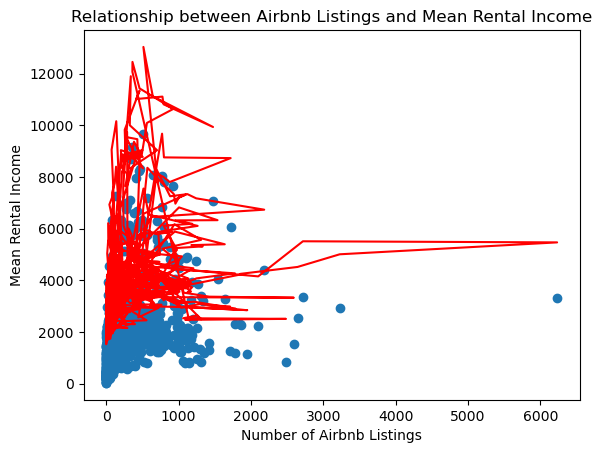

In [497]:
import statsmodels.api as sm

# Load the Airbnb and rental income data into pandas dataframes
#airbnb_data = pd.read_csv("airbnb_listings.csv")
#rental_income_data = pd.read_csv("rental_income.csv")

# Merge the two dataframes on a common column, such as zip code
#merged_data = pd.merge(airbnb_data, rental_income_data, on='zip_code')
reg_merg = reg_merg.dropna()

# Add a constant to the independent variable (Airbnb listings) for the regression analysis
reg_merg = sm.add_constant(reg_merg)

# Fit a linear regression model to the data
model = sm.OLS(reg_merg['vacant_housing_units'], reg_merg[['const', 'id']]).fit()

# Print the summary of the model
print(model.summary())

# Extract the coefficient and p-value for the independent variable (Airbnb listings)
coef = model.params['id']
pvalue = model.pvalues['id']

# Print the coefficient and p-value
print("The coefficient for the number of Airbnb listings is:", coef)
print("The p-value for the number of Airbnb listings is:", pvalue)

# Check if the relationship is significant by comparing the p-value to a significance level (e.g., 0.05)
if pvalue < 0.05:
    print("The relationship between the number of Airbnb listings and mean rental income is significant.")
else:
    print("The relationship between the number of Airbnb listings and mean rental income is not significant.")

# Visualize the relationship by plotting a scatter plot of the two variables and the regression line
plt.scatter(reg_merg['id'], reg_merg['vacant_housing_units'])
plt.plot(reg_merg['id'], coef * reg_merg['vacant_housing_units'] + model.params['const'], '-', color='red')
plt.xlabel("Number of Airbnb Listings")
plt.ylabel("Mean Rental Income")
plt.title("Relationship between Airbnb Listings and Mean Rental Income")
plt.show()

***PRESENTATION CHARTS***

In [508]:

mean_hvalue_nyc = acs_housing.dropna().groupby(['year'])['own_occ_median_value','rent_occ_median_rent'].mean().reset_index()


/var/folders/2y/7l8y_vkj01l4y5yq6yr69y0w0000gn/T/ipykernel_99259/1663123403.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  mean_hvalue_nyc = acs_housing.dropna().groupby(['year'])['own_occ_median_value','rent_occ_median_rent'].mean().reset_index()


In [524]:
acs_income.columns

Index(['year', 'borough', 'zipcode', 'households_s1901_total_population',
       'households_s1902_total_population', 'households_median_income',
       'households_s1901_mean_income', 'households_s1902_mean_income',
       'families_total_population', 'families_median_income',
       'families_mean_income', 'married_couple_families_total_population',
       'married_couple_families_median_income',
       'married_couple_families_mean_income',
       'nonfamily_households_total_population',
       'nonfamily_households_median_income',
       'nonfamily_households_mean_income', 'resident_total_population',
       'resident_mean_income', 'white_total_population', 'white_mean_income',
       'african_american_total_population', 'african_american_mean_income',
       'amer_indian/alaska_native_total_population',
       'amer_indian/alaska_native_mean_income', 'asian_total_population',
       'asian_mean_income', 'hawaiian/_pacific_islander_total_population',
       'hawaiian/_pacific_islan

In [ ]:
acs_income.

In [529]:
acs_income['res_multiply'] = acs_income['resident_mean_income'] * acs_income['households_s1902_total_population']
acs_income['res_divide'] = acs_income['households_s1902_total_population']

In [535]:
acs_income

,year,borough,zipcode,households_s1901_total_population,households_s1902_total_population,households_median_income,households_s1901_mean_income,households_s1902_mean_income,families_total_population,families_median_income,...,other_race_total_population,other_race_mean_income,two_or_more_races_total_population,two_or_more_races_mean_income,latino_total_population,latino_mean_income,white_alone(not_latino)_total_population,white_alone(not_latino)_mean_income,res_multiply,res_divide
0,2011,BRONX,10451,16596.0,16596.0,25044,35281.0,35281.0,9794.0,29327,...,26.5,11594.0,3.1,13157.0,57.0,11573.0,1.9,17186.0,2.375883e+08,16596.0
1,2011,BRONX,10452,24760.0,24760.0,27040,35744.0,35744.0,17019.0,29543,...,46.8,11523.0,2.5,10579.0,68.4,11477.0,1.1,14110.0,3.175965e+08,24760.0
2,2011,BRONX,10453,25103.0,25103.0,26574,36352.0,36352.0,17769.0,27967,...,48.9,11784.0,3.9,6797.0,65.8,11504.0,1.2,23019.0,3.200632e+08,25103.0
3,2011,BRONX,10454,12433.0,12433.0,19840,33417.0,33417.0,8573.0,23540,...,24.2,11736.0,1.8,9393.0,72.0,12210.0,2.0,20874.0,1.493328e+08,12433.0
4,2011,BRONX,10455,12542.0,12542.0,23830,33418.0,33418.0,8229.0,29987,...,39.6,11575.0,2.1,6981.0,76.6,12386.0,1.9,13570.0,1.552449e+08,12542.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2370,2021,STATEN_ISLAND,10309,12114.0,12114.0,107500,133325.0,133325.0,9253.0,125028,...,507,24677.0,930,25417.0,2813,24280.0,30927,49079.0,5.584796e+08,12114.0
2371,2021,STATEN_ISLAND,10310,9070.0,9070.0,96161,108100.0,108100.0,6729.0,114332,...,2190,28622.0,2093,23952.0,7571,24767.0,11328,52193.0,3.442337e+08,9070.0
2372,2021,STATEN_ISLAND,10311,0.0,0.0,NaN,NaN,NaN,0.0,NaN,...,0,NaN,0,NaN,0,NaN,0,NaN,NaN,0.0
2373,2021,STATEN_ISLAND,10312,21708.0,21708.0,100875,123417.0,123417.0,16800.0,119302,...,1102,33832.0,2771,31446.0,7854,32133.0,50218,45567.0,9.297319e+08,21708.0


In [530]:
m_inc = acs_income.groupby(['year'])['res_multiply','res_divide'].sum()

/var/folders/2y/7l8y_vkj01l4y5yq6yr69y0w0000gn/T/ipykernel_99259/2210073906.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  m_inc = acs_income.groupby(['year'])['res_multiply','res_divide'].sum()


In [532]:
m_inc['Mean Income'] = m_inc['res_multiply']/m_inc['res_divide']

In [534]:
acs_income.groupby('year')['resident_mean_income'].mean()

year
2011    37890.263441
2012    38327.586022
2013    38637.870270
2014    39146.556757
2015    39792.378378
2016    40815.513514
2017    42372.945946
2018    44412.362162
2019    46796.356757
2020    49990.789189
2021    55299.636364
Name: resident_mean_income, dtype: float64

In [533]:
m_inc

,res_multiply,res_divide,Mean Income
year,,,
2011,1.087988e+11,3102605.0,35066.919522
2012,1.102456e+11,3115717.0,35383.702180
2013,1.116762e+11,3122361.0,35766.601064
2014,1.141455e+11,3148162.0,36257.818552
2015,1.170791e+11,3165572.0,36985.123562
2016,1.209687e+11,3180175.0,38038.383960
2017,1.271236e+11,3194410.0,39795.656317
2018,1.337952e+11,3206453.0,41726.861786
2019,1.414648e+11,3219631.0,43938.214764


In [528]:
acs_income[['households_s1902_total_population','households_s1902_mean_income','households_s1901_total_population','households_s1901_mean_income']]

,households_s1902_total_population,households_s1902_mean_income,households_s1901_total_population,households_s1901_mean_income
0,16596.0,35281.0,16596.0,35281.0
1,24760.0,35744.0,24760.0,35744.0
2,25103.0,36352.0,25103.0,36352.0
3,12433.0,33417.0,12433.0,33417.0
4,12542.0,33418.0,12542.0,33418.0
...,...,...,...,...
2370,12114.0,133325.0,12114.0,133325.0
2371,9070.0,108100.0,9070.0,108100.0
2372,0.0,NaN,0.0,NaN
2373,21708.0,123417.0,21708.0,123417.0


In [513]:
mean_hvalue_nyc

,year,own_occ_median_value,rent_occ_median_rent
0,2011,552983.425414,1248.276243
1,2012,544379.005525,1291.110497
2,2013,540053.038674,1325.204420
3,2014,539807.734807,1356.259669
4,2015,570907.222222,1442.861111
5,2016,591298.324022,1477.296089
6,2017,624974.301676,1529.720670
7,2018,650330.337079,1586.101124
8,2019,682237.988827,1636.854749
9,2020,719953.333333,1683.827778


In [521]:
zhome_value.groupby(['year'])['home_value'].mean().to_frame().reset_index()

,year,home_value
0,2002,388185.197814
1,2003,427488.437141
2,2004,475856.334858
3,2005,563629.120427
4,2006,640005.374812
5,2007,642873.288725
6,2008,645294.235553
7,2009,611269.790330
8,2010,580224.588095
9,2011,595607.424716


In [522]:
rental_prices.groupby(['year'])['rent'].mean().to_frame().reset_index()

,year,rent
0,2015,2586.069370
1,2016,2622.207849
2,2017,2709.264558
3,2018,2751.508241
4,2019,2835.530741
5,2020,2745.855810
6,2021,2684.222760
7,2022,3522.746297


In [536]:
airbnb.groupby(['year'])['id'].count()

year
2015    33446
2016    39133
2017    46742
2018    48191
2019    49773
2020    36275
2021    36116
2022    45827
Name: id, dtype: int64

In [538]:
acs_housing.groupby(['year','borough'])['rent_occ_median_rent'].mean().to_frame()

rent_occ_median_rent
year borough                            
2011 BRONX                    972.846154
     BROOKLYN                1101.736842
     MANHATTAN               1537.800000
     QUEENS                  1274.344262
     STATEN_ISLAND           1153.500000
2012 BRONX                   1007.423077
     BROOKLYN                1144.631579
     MANHATTAN               1584.622222
     QUEENS                  1320.278689
     STATEN_ISLAND           1179.750000
2013 BRONX                   1039.923077
     BROOKLYN                1184.263158
     MANHATTAN               1615.288889
     QUEENS                  1358.704918
     STATEN_ISLAND           1187.750000
2014 BRONX                   1068.423077
     BROOKLYN                1231.157895
     MANHATTAN               1651.488889
     QUEENS                  1386.573770
     STATEN_ISLAND           1168.500000
2015 BRONX                   1086.384615
     BROOKLYN                1253.184211
     MANHATTAN               1920.266667
     QUEENS                  1442.150000
     STATEN_ISLAND           1159.666667
2016 BRONX                   1108.192308
     BROOKLYN                1296.447368
     MANHATTAN               1966.400000
     QUEENS                  1477.066667
     STATEN_ISLAND           1189.916667
2017 BRONX                   1147.461538
     BROOKLYN                1354.815789
     MANHATTAN               2023.422222
     QUEENS                  1520.745763
     STATEN_ISLAND           1232.666667
2018 BRONX                   1182.538462
     BROOKLYN                1420.842105
     MANHATTAN               2110.844444
     QUEENS                  1587.661017
     STATEN_ISLAND           1286.583333
2019 BRONX                   1222.461538
     BROOKLYN                1480.736842
     MANHATTAN               2121.522727
     QUEENS                  1632.333333
     STATEN_ISLAND           1329.166667
2020 BRONX                   1250.461538
     BROOKLYN                1546.157895
     MANHATTAN               2176.977778
     QUEENS                  1670.433333
     STATEN_ISLAND           1392.166667
2021 BRONX                   1338.629630
     BROOKLYN                1662.076923
     MANHATTAN               2257.688889
     QUEENS                  1773.606557
     STATEN_ISLAND           1463.750000

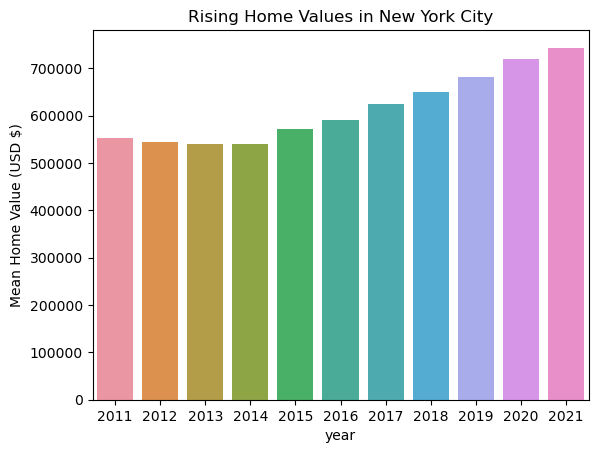

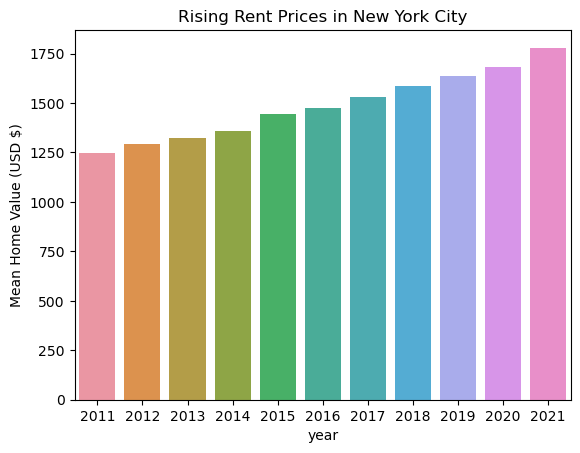

In [510]:
ax = sns.barplot(data=mean_hvalue_nyc, x='year',y='own_occ_median_value')
ax.set_title('Rising Home Values in New York City')
ax.set_ylabel('Mean Home Value (USD $)')
plt.show()

ax = sns.barplot(data=mean_hvalue_nyc, x='year',y='rent_occ_median_rent')
ax.set_title('Rising Rent Prices in New York City')
ax.set_ylabel('Mean Home Value (USD $)')
plt.show()